In [1]:
import csv 
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_file(filename):
    data = []
    counter = 0
    with open(filename) as infile:
        csv_contents = csv.reader(infile, delimiter = ',')
        for row in csv_contents:
            if counter == 0:
                counter += 1
            else:
                data.append(row)
    return data

def date_to_nth_day(date, format='%m/%d/%y'):
    date = pd.to_datetime(date, format=format)
    new_year_day = pd.Timestamp(year=date.year, month=1, day=1)
    return (date - new_year_day).days + 1

def edit_data(data, yr):
    edited = []
    wordcount = 0
    bookcount = 0

    for row in data:
        if int(row[2][-2:]) == yr:
            day_of_year = date_to_nth_day(row[2])
        
            wordcount += int(row[3])
            bookcount += 1

            newrow = [row[0], row[1], row[2], row[3]]
            newrow.append(wordcount)
            newrow.append(bookcount)
            newrow.append(day_of_year)
            
            edited.append(newrow)
            
    return edited

def get_element(data, index):
    list = []
    for row in data:
        element = row[index]
        list.append(element)
        
    return list

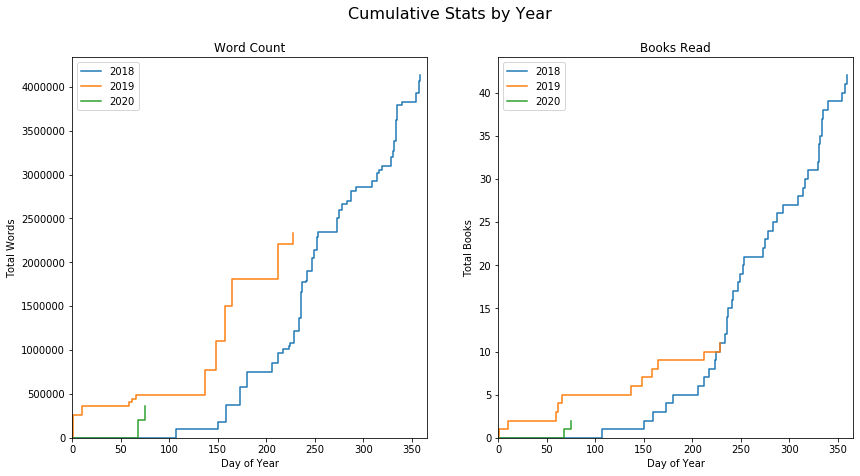

In [76]:
books = read_file('completedbooks.csv')

b_18 = edit_data(books, 18)
b_19 = edit_data(books, 19)
b_20 = edit_data(books, 20)

doy_18 = get_element(b_18, 6)
wc_18 = get_element(b_18, 4)
bc_18 = get_element(b_18, 5)
doy_18.insert(0,0)
wc_18.insert(0,0)
bc_18.insert(0,0)

doy_19 = get_element(b_19, 6)
wc_19 = get_element(b_19, 4)
bc_19 = get_element(b_19, 5)
doy_19.insert(0,0)
wc_19.insert(0,0)
bc_19.insert(0,0)

doy_20 = get_element(b_20, 6)
wc_20 = get_element(b_20, 4)
bc_20 = get_element(b_20, 5)
doy_20.insert(0,0)
wc_20.insert(0,0)
bc_20.insert(0,0)

fig, axs = plt.subplots(1, 2)

axs[0].plot(doy_18, wc_18, drawstyle='steps-post') #row=0, col=0
axs[0].plot(doy_19, wc_19, drawstyle='steps-post')
axs[0].plot(doy_20, wc_20, drawstyle='steps-post')
axs[0].set_ylim(ymin=0)
axs[0].set_xlim(xmin=0, xmax=366)
axs[0].set_title('Word Count')
axs[0].set_ylabel('Total Words')
axs[0].set_xlabel('Day of Year')
axs[0].set_xlim()


axs[1].plot(doy_18, bc_18, drawstyle='steps-post') #row=1, col=0
axs[1].plot(doy_19, bc_19, drawstyle='steps-post')
axs[1].plot(doy_20, bc_20, drawstyle='steps-post')
axs[1].set_ylim(ymin=0)
axs[1].set_xlim(xmin=0, xmax=366)
axs[1].title.set_text('Books Read')
axs[1].set_ylabel('Total Books')
axs[1].set_xlabel('Day of Year')

fig.suptitle('Cumulative Stats by Year', size = 16) # or plt.suptitle('Main title')
axs[0].legend(['2018', '2019', '2020'], loc='upper left')
axs[1].legend(['2018', '2019', '2020'], loc='upper left')
fig = plt.gcf()
fig.set_size_inches(14, 7)

plt.savefig('book_wordsperyear.png', bbox_inches='tight', pad_inches = 0.5)


In [80]:
bookgenres = []

for row in books:
    genre = row[4]
    genre = genre.lower()
    bookgenres.append(genre)
    
genres = set(bookgenres)
genres = sorted(genres)

counts = []
for genre in genres:
    count = 0
    for entry in bookgenres:
        if entry == genre:
            count += 1
    counts.append(count)

countdf = pd.DataFrame({'genre': genres, 'count': counts})
countdf = countdf.sort_values(by=['count'], ascending = True)

print(countdf)

                    genre  count
0              collection      1
1    contemporary fantasy      1
4      historical fiction      1
5   historical nonfiction      1
6                  horror      1
8                  poetry      1
10       post-apocalyptic      1
13          urban fantasy      1
9         popular science      2
15          weird fiction      2
14          weird fantasy      3
3                 fiction      4
7              nonfiction      4
11        science fantasy      4
12        science fiction      8
2                 fantasy     20


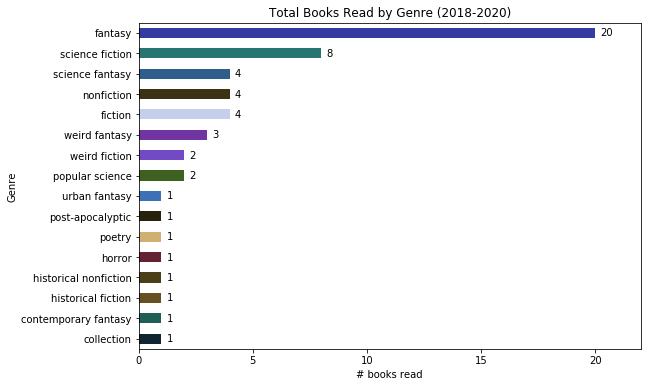

In [78]:
frequencies = countdf['count']

freq_series = pd.Series(frequencies)

y_labels = countdf['genre']


# Plot the figure.
# palette: https://colourco.de/freebuild/353c9f-277573-2f5e8c-3a3213-c5cfec-7035a0-724ac3-3e6120-3c72b5-26220d-d0af73-632132-494018-655022-205f53-102531
plt.figure(figsize=(9, 6))
ax = freq_series.plot(kind='barh', grid = False, 
                      color = ['#102531', '#205F53', '#655022', '#494018', '#632132', '#D0AF73', '#26220D', '#3C72B5', 
                               '#3E6120', '#724AC3', '#7035A0', '#C5CFEC', '#3A3213', '#2F5E8C', '#277573', '#353C9F'])
ax.set_title('Total Books Read by Genre (2018-2020)')
ax.set_xlabel('# books read')
ax.set_ylabel('Genre')
ax.set_yticklabels(y_labels)
ax.set_xlim(0, 22) # expand xlim to make labels easier to read
ax.set_xticks(np.arange(0, 22, step=5))


rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.
        
plt.savefig('book_genres.png', bbox_inches='tight', pad_inches = 0.5)
    
plt.show()

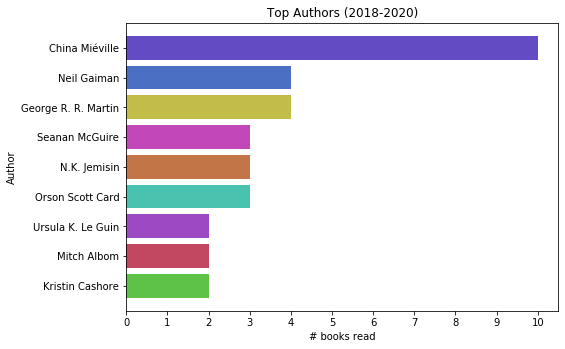

In [79]:
authorlist = []

for row in books:
    authors = row[1]
    if authors.find(',') == -1:
        authorlist.append(authors)
    else:
        splitlist = authors.split(', ')
        for author in splitlist:
            authorlist.append(author)
            
distinct_authors = set(authorlist)
distinct_authors = sorted(distinct_authors)
author_counts = []
for author in distinct_authors:
    author_counts.append(authorlist.count(author))

authcountdf = pd.DataFrame({'author': distinct_authors, 'count': author_counts})
authcountdf = authcountdf.sort_values(by=['count'], ascending = True)
authcountdf = authcountdf.loc[authcountdf['count'] >= 2]

# palette: https://colourco.de/freebuild/634cc3-4b6fc3-c2bc49-c247b9-c27648-49c2af-9c4ac3-c24760-5ec248
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(authcountdf['author'], authcountdf['count'], 
        color = ['#5EC248', '#C24760', '#9C4AC3', '#49C2AF', '#C27648', '#C247B9', '#C2BC49', '#4B6FC3', '#634CC3'])
ax.set_title('Top Authors (2018-2020)')
ax.set_xlabel('# books read')
ax.set_ylabel('Author')
ax.set_xticks(np.arange(0, 11, step=1))

plt.savefig('book_authors.png', bbox_inches='tight', pad_inches = 0.5)

plt.show()
